In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [4]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
from datasets import load_dataset, concatenate_datasets
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from scipy.stats import entropy
# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# 데이터 로딩 및 문장 추출
dataset = load_dataset("li2017dailydialog/daily_dialog")
combined_dataset = concatenate_datasets([dataset['train'], dataset['validation'], dataset['test']])
df = pd.DataFrame(combined_dataset)
dialogues = df['dialog']

sentences = []
for conversation in dialogues:
    sentences.extend(conversation)

# 문장 임베딩 모델 로드 (MiniLM)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2').to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

daily_dialog.py:   0%|          | 0.00/4.85k [00:00<?, ?B/s]

The repository for li2017dailydialog/daily_dialog contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/li2017dailydialog/daily_dialog.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] ㅛ
The repository for li2017dailydialog/daily_dialog contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/li2017dailydialog/daily_dialog.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/11118 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
# 토큰 임베딩 생성 함수
def generate_token_embeddings(sentences, batch_size=16):
    all_embs = []
    for i in tqdm(range(0, len(sentences), batch_size), desc="토큰 임베딩 생성"):
        batch = sentences[i:i+batch_size] # 배치 단위로 자르기
        # 토큰화
        inputs = model.tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=128).to(device)

        with torch.no_grad():
          # transformer만 꺼내서 사용해 임베딩 벡터를 outputs에 저장 (학습되어있는 모델로 추론만)
            outputs = model[0].auto_model(**inputs)
          # 실제 토큰이면 1 아님 0을 해줌
            mask = inputs['attention_mask'].cpu().numpy()
            for j in range(outputs.last_hidden_state.shape[0]):
              # 유효 토큰 길이만큼 슬라이싱 [1, 1, 1, 1, 0, 0] → valid_len = 4
                valid_len = mask[j].sum()
              # 패딩 제거하고 실제 토큰 임베딩만 가져옴
                if valid_len > 2:  # 최소 [CLS], token, [SEP] = 3 이상일 때만 유효
                    all_embs.extend(outputs.last_hidden_state[j, 1:valid_len-1].cpu().numpy())
    return np.array(all_embs)

token_embs = generate_token_embeddings(sentences)
print(f"생성된 토큰 임베딩 수: {len(token_embs)}, 차원: {token_embs.shape[1]}")


토큰 임베딩 생성: 100%|██████████| 6437/6437 [00:50<00:00, 126.27it/s]


생성된 토큰 임베딩 수: 1515833, 차원: 384


In [8]:
# PyTorch Dataset 정의
# PyTorch 모델 학습에 쓸 수 있도록 PyTorch의 Dataset과 DataLoader 형태로 변환하는 것
class EmbeddingDataset(Dataset):
    def __init__(self, embeddings):
        self.embeddings = torch.tensor(embeddings, dtype=torch.float32) # tensor로 변환
    def __len__(self):
        return len(self.embeddings) # len하면 길이 반환
    def __getitem__(self, idx):
        return self.embeddings[idx] # idx하면 idx에 들어가있는 임베딩 벡터 반환

# 함수 통과 우리가 만들어놓은 데이터
dataset = EmbeddingDataset(token_embs)
# dataloader에 data불러오고 섞기
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [9]:
class NormalizeAndScale(nn.Module):
    def __init__(self, scale=30.0):
        super().__init__()
        self.scale = scale

    def forward(self, x):
        x = F.normalize(x, p=2, dim=1)  # L2 정규화
        return x * self.scale

In [10]:
from sklearn.cluster import KMeans
import numpy as np

class VQVAE(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=192, num_embeddings=100, embedding_dim=48, beta=0.5, decay=0.99):
        super().__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.beta = beta
        self.decay = decay


        # 인코더
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(192, 96),
            nn.ELU(),
            nn.Linear(96, embedding_dim),
            NormalizeAndScale(scale=10.0)
       )


        # 코드북
        self.codebook = nn.Embedding(num_embeddings, embedding_dim)

        # 디코더
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 96),
            nn.ELU(),
            nn.Linear(96, hidden_dim),
            nn.ELU(),
            nn.Dropout(p=0.3),
            nn.Linear(192, input_dim)
        )

        # EMA 관련 변수 선언
        # register_buffer은 모델 내부에 등록되고 저장됨. 학습 대상은 아님.
        self.register_buffer('ema_cluster_size', torch.zeros(num_embeddings)) # 코드북 벡터가 몇번 사용됐는지
        self.register_buffer('ema_w', torch.zeros(num_embeddings, embedding_dim)) # 각 클러스터에 할당된 z_e의 누적합
        self.codebook_usage = torch.zeros(num_embeddings, device=device) # 코드북 벡터가 몇번 사용됐는지

    def forward(self, x):
        z_e = self.encoder(x)

        # 코드북과 거리 계산 → 가장 가까운 벡터 선택
        distances = torch.cdist(z_e, self.codebook.weight) # 각 z_e와 모든 코드북 벡터 간 거리 계산
        indices = torch.argmin(distances, dim=1) # 가장 가까운 코드북 벡터 인덱스 선택
        z_q = self.codebook(indices) # 벡터 선택 (양자화된 벡터 z_q 획득)


        # EMA 업데이트 (z_q가 좀 부드럽게 움직이도록)
        if self.training:
            with torch.no_grad():
                one_hot = F.one_hot(indices, self.num_embeddings).float() # 코드북 벡터를 선택하면 1 아님 0 one-hot
                cluster_size = one_hot.sum(0) # 원핫벡터 누적합
                self.ema_cluster_size = self.decay * self.ema_cluster_size + (1 - self.decay) * cluster_size # ema
                dw = torch.matmul(one_hot.T, z_e) # z_e의 누적합
                self.ema_w = self.decay * self.ema_w + (1 - self.decay) * dw
                n = self.ema_cluster_size.sum()
                updated_cluster_size = (self.ema_cluster_size + 1e-5) / (n + self.num_embeddings * 1e-5) * n
                self.codebook.weight.data = self.ema_w / updated_cluster_size.unsqueeze(-1)

            # 죽은 코드북 벡터 살리기
            dead_mask = self.ema_cluster_size < 1e-2  # 각 코드북 벡터가 얼마나 자주 선택되었는지를 추적하는 지표
            if dead_mask.sum() > 0: # 죽은 벡터가 하나라도 있다면
            # 3. z_e 중 랜덤으로 뽑아서 그걸로 죽은 코드북 벡터들을 초기화
                rand_indices = torch.randint(0, z_e.shape[0], (dead_mask.sum(),), device=z_e.device)
                self.codebook.weight.data[dead_mask] = z_e[rand_indices]

       # 손실 계산
        recon_loss = F.mse_loss(self.decoder(z_q), x) # 재구성 손실
        commit_loss = F.mse_loss(z_e, z_q.detach()) # z_e와 z_q간의 손실


        #  Shannon Entropy 기반 codebook 분포 패널티
        #  코드북을 하나만 사용하는 걸 방지하기 위해서 shannon entropy가 작으면 패널티를 주는 걸로
        usage_probs = self.codebook_usage / (self.codebook_usage.sum() + 1e-9)#  코드북 벡터의 사용 비율
        entropy_penalty = - (usage_probs * torch.log2(usage_probs + 1e-9)).sum() # Shannon Entropy 계산

        loss = recon_loss + self.beta * commit_loss  #entropy_weight * entropy_penalty


        # 코드북 사용 기록
        unique_indices, counts = torch.unique(indices, return_counts=True)
        self.codebook_usage[unique_indices] += counts.float().to(device)

        return self.decoder(z_q), z_e, z_q, indices, loss, recon_loss, commit_loss

In [11]:
token_tensor = torch.tensor(token_embs, dtype=torch.float32).to(device)
NUM_EMBEDDINGS = 100
EMBED_DIM = 48
vqvae = VQVAE(input_dim=384, num_embeddings=NUM_EMBEDDINGS, embedding_dim=EMBED_DIM).to(device)
z_e_tensor = vqvae.encoder(token_tensor).detach().cpu().numpy()
print("z_e std:", np.std(z_e_tensor))              # 전체 std
print("z_e per-dim std:", np.std(z_e_tensor, axis=0))  # 각 차원별 std

z_e std: 1.4427208
z_e per-dim std: [0.90570986 1.109069   1.1201187  1.058136   0.99859816 1.2661263
 1.0934743  1.1572648  1.2725201  1.2123951  1.3644295  1.0111328
 1.1787472  1.1513959  1.075377   1.0436524  1.0528194  1.1722654
 1.1318791  1.0503674  1.1663365  1.2752728  1.2455945  1.2271978
 1.2384948  1.2492851  1.0883278  0.9075352  1.0884497  1.084261
 0.96201885 1.0739031  1.1946427  1.0356143  1.0911685  0.9745886
 1.1082456  1.1980004  0.9912603  1.0281656  1.2464317  1.1321735
 0.9245048  1.2436215  1.1984073  1.2007347  1.2064267  0.9336849 ]


In [12]:
NUM_EMBEDDINGS = 100
EMBED_DIM = 48
#vqvae에 가져오기
vqvae = VQVAE(input_dim=384, num_embeddings=NUM_EMBEDDINGS, embedding_dim=EMBED_DIM).to(device)

# cluster로 초기 값 설정. -> 빠른 수렴 + 학습 원할하게 해주려고.

# 이전에 numpy 배열로 저장한 토큰 임베딩 tensor로 변환
token_tensor = torch.tensor(token_embs, dtype=torch.float32).to(device)

# 1. z_e 전체 추출
with torch.no_grad():
    z_e_all = vqvae.encoder(token_tensor).cpu().numpy()  # (전체 토큰 수, embedding_dim)

# 2. 무작위 샘플링
num_samples = min(1000000, len(z_e_all))
sample_indices = np.random.choice(len(z_e_all), size=num_samples, replace=False)
sample_z_e = z_e_all[sample_indices]

# 3. 샘플 기반 KMeans 클러스터링
kmeans = KMeans(n_clusters=NUM_EMBEDDINGS, random_state=42).fit(sample_z_e)

# 4. 클러스터 중심으로 codebook 초기화
vqvae.codebook.weight.data = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32).to(device)
vqvae.ema_w = vqvae.codebook.weight.data.clone()

In [13]:
import torch.optim as optim
import numpy as np

optimizer = optim.Adam(vqvae.parameters(), lr=3e-3)
usage_history = []

epochs = 30
patience = 5  # 몇 번 동안 개선 없으면 멈출지
best_loss = float('inf')
wait = 0  # 개선되지 않은 epoch 수

for epoch in range(epochs):
    total_loss = total_recon_loss = total_commit_loss = 0
    vqvae.codebook_usage.zero_()

    for batch in tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
        batch = batch.to(device)
        optimizer.zero_grad()

        _, _, _, _, loss, recon_loss, commit_loss = vqvae(batch)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_recon_loss += recon_loss.item()
        total_commit_loss += commit_loss.item()

    avg_loss = total_loss / len(dataloader)
    avg_recon = total_recon_loss / len(dataloader)
    avg_commit = total_commit_loss / len(dataloader)

    print(
        f"Loss: {avg_loss:.4f} | "
        f"Recon Loss: {avg_recon:.4f} | "
        f"Commit Loss: {avg_commit:.4f} | "
        f"코드북 사용: {(vqvae.codebook_usage > 0).sum().item()}/{NUM_EMBEDDINGS}"
    )

    usage_history.append(vqvae.codebook_usage.cpu().numpy().copy())

    # ==== Early Stopping ====
    if avg_loss < best_loss - 1e-4:  # 개선된 경우 (작은 차이도 허용)
        best_loss = avg_loss
        wait = 0
    else:
        wait += 1
        print(f" EarlyStopping 대기 중: {wait}/{patience}")

        if wait >= patience:
            print(f"{epoch+1}번째 epoch에서 Early Stopping ")
            break


Epoch 1/30: 100%|██████████| 23685/23685 [01:48<00:00, 219.04it/s]


Loss: 0.2837 | Recon Loss: 0.2829 | Commit Loss: 0.0015 | 코드북 사용: 100/100


Epoch 2/30: 100%|██████████| 23685/23685 [01:49<00:00, 216.26it/s]


Loss: 0.2794 | Recon Loss: 0.2792 | Commit Loss: 0.0002 | 코드북 사용: 100/100


Epoch 3/30: 100%|██████████| 23685/23685 [01:47<00:00, 220.03it/s]


Loss: 0.2800 | Recon Loss: 0.2799 | Commit Loss: 0.0003 | 코드북 사용: 100/100


Epoch 4/30: 100%|██████████| 23685/23685 [01:46<00:00, 221.45it/s]


Loss: 0.2790 | Recon Loss: 0.2788 | Commit Loss: 0.0005 | 코드북 사용: 100/100


Epoch 5/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.38it/s]


Loss: 0.2721 | Recon Loss: 0.2721 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 6/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.14it/s]


Loss: 0.2594 | Recon Loss: 0.2594 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 7/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.06it/s]


Loss: 0.2558 | Recon Loss: 0.2558 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 8/30: 100%|██████████| 23685/23685 [01:47<00:00, 219.76it/s]


Loss: 0.2532 | Recon Loss: 0.2532 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 9/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.62it/s]


Loss: 0.2511 | Recon Loss: 0.2511 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 10/30: 100%|██████████| 23685/23685 [01:47<00:00, 221.25it/s]


Loss: 0.2503 | Recon Loss: 0.2503 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 11/30: 100%|██████████| 23685/23685 [01:47<00:00, 220.07it/s]


Loss: 0.2505 | Recon Loss: 0.2505 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 12/30: 100%|██████████| 23685/23685 [01:47<00:00, 220.95it/s]


Loss: 0.2492 | Recon Loss: 0.2492 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 13/30: 100%|██████████| 23685/23685 [01:47<00:00, 220.92it/s]


Loss: 0.2490 | Recon Loss: 0.2490 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 14/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.70it/s]


Loss: 0.2488 | Recon Loss: 0.2488 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 15/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.74it/s]


Loss: 0.2477 | Recon Loss: 0.2477 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 16/30: 100%|██████████| 23685/23685 [01:47<00:00, 220.95it/s]


Loss: 0.2468 | Recon Loss: 0.2468 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 17/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.61it/s]


Loss: 0.2472 | Recon Loss: 0.2472 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 18/30: 100%|██████████| 23685/23685 [01:47<00:00, 219.90it/s]


Loss: 0.2460 | Recon Loss: 0.2460 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 19/30: 100%|██████████| 23685/23685 [01:47<00:00, 221.16it/s]


Loss: 0.2443 | Recon Loss: 0.2443 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 20/30: 100%|██████████| 23685/23685 [01:47<00:00, 220.73it/s]


Loss: 0.2442 | Recon Loss: 0.2442 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 21/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.72it/s]


Loss: 0.2443 | Recon Loss: 0.2443 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 22/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.11it/s]


Loss: 0.2445 | Recon Loss: 0.2445 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 23/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.96it/s]


Loss: 0.2447 | Recon Loss: 0.2447 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 24/30: 100%|██████████| 23685/23685 [01:45<00:00, 223.54it/s]


Loss: 0.2446 | Recon Loss: 0.2446 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 25/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.12it/s]


Loss: 0.2447 | Recon Loss: 0.2447 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 26/30: 100%|██████████| 23685/23685 [01:45<00:00, 223.83it/s]


Loss: 0.2445 | Recon Loss: 0.2445 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 27/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.99it/s]


Loss: 0.2445 | Recon Loss: 0.2445 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 28/30: 100%|██████████| 23685/23685 [01:46<00:00, 222.77it/s]


Loss: 0.2447 | Recon Loss: 0.2447 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 29/30: 100%|██████████| 23685/23685 [01:45<00:00, 224.03it/s]


Loss: 0.2450 | Recon Loss: 0.2450 | Commit Loss: 0.0000 | 코드북 사용: 100/100


Epoch 30/30: 100%|██████████| 23685/23685 [01:45<00:00, 223.76it/s]

Loss: 0.2451 | Recon Loss: 0.2451 | Commit Loss: 0.0000 | 코드북 사용: 100/100


In [14]:
# 변경됨: 학습 완료 모델 저장
torch.save(vqvae.state_dict(), "vqvae_trained.pt")

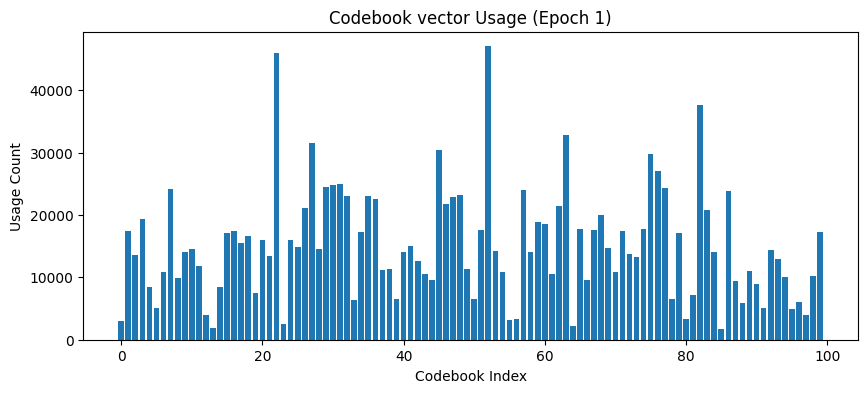

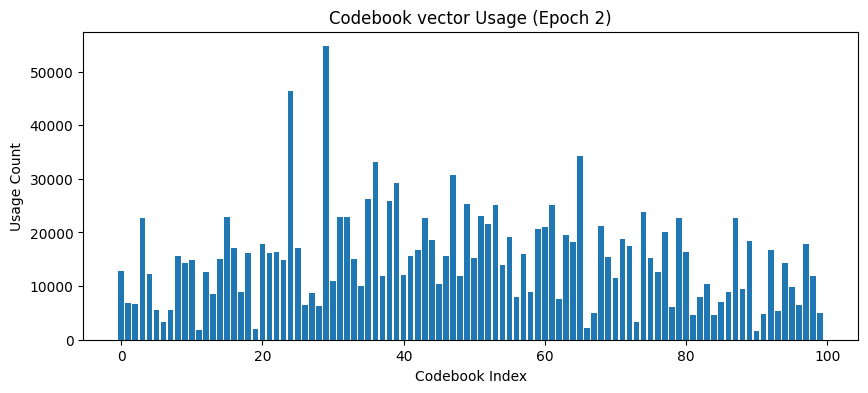

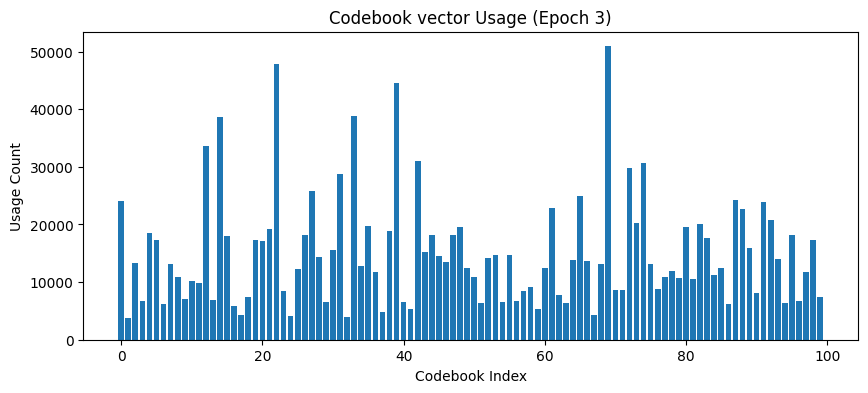

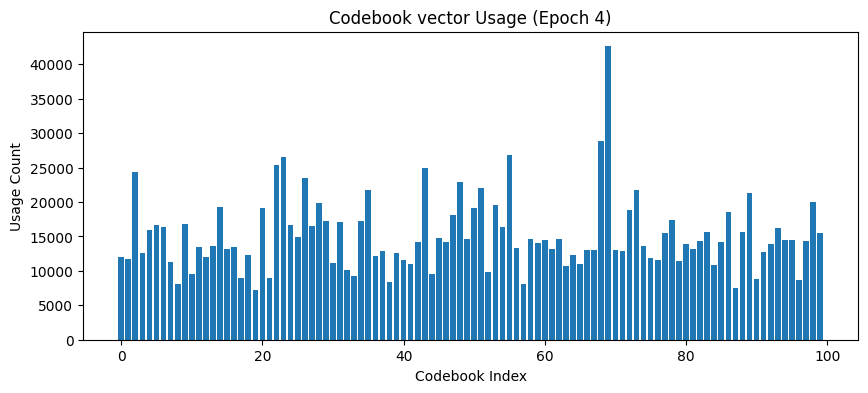

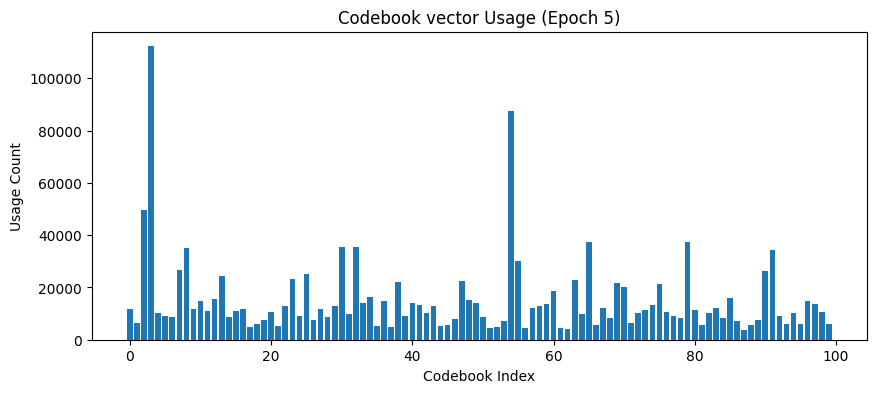

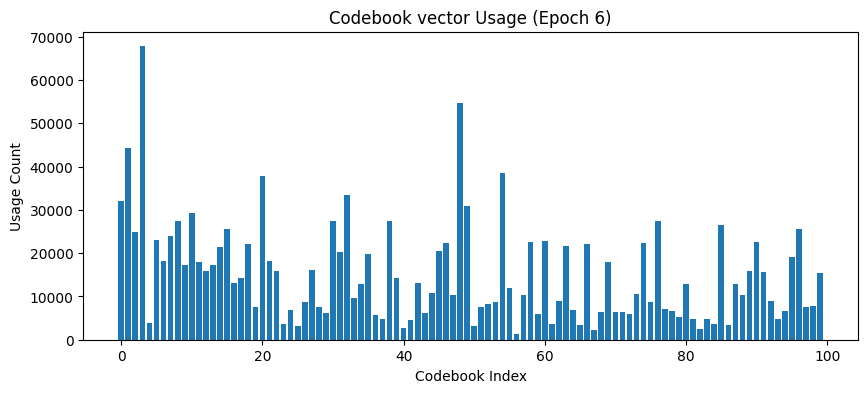

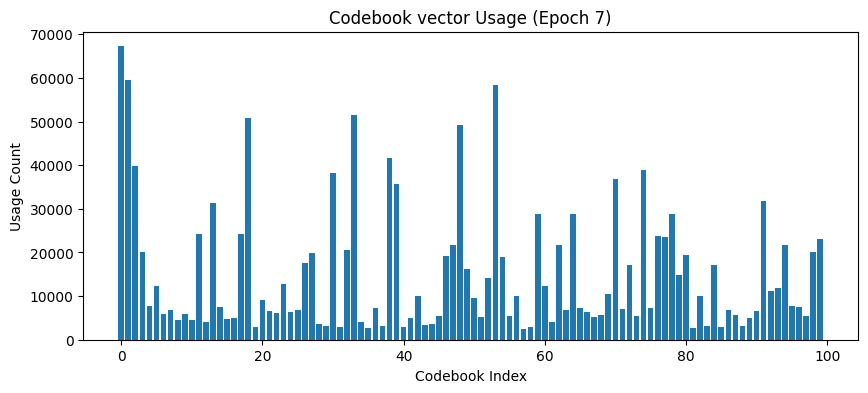

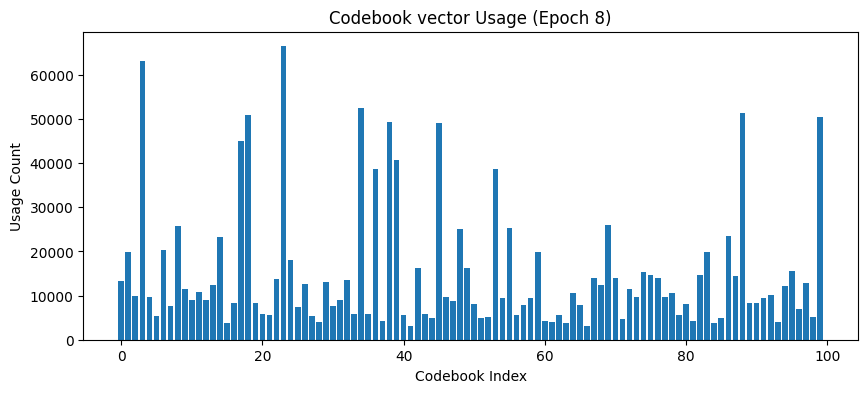

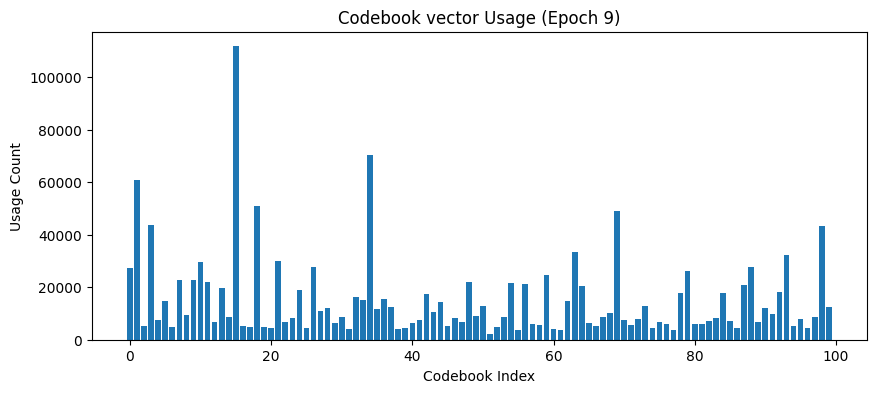

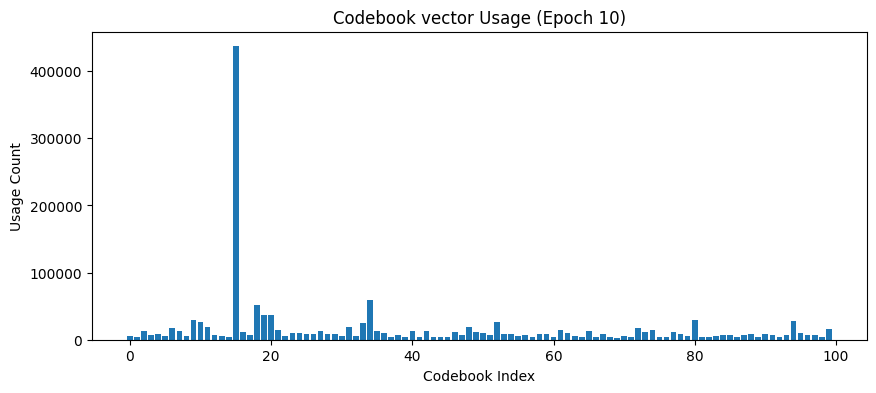

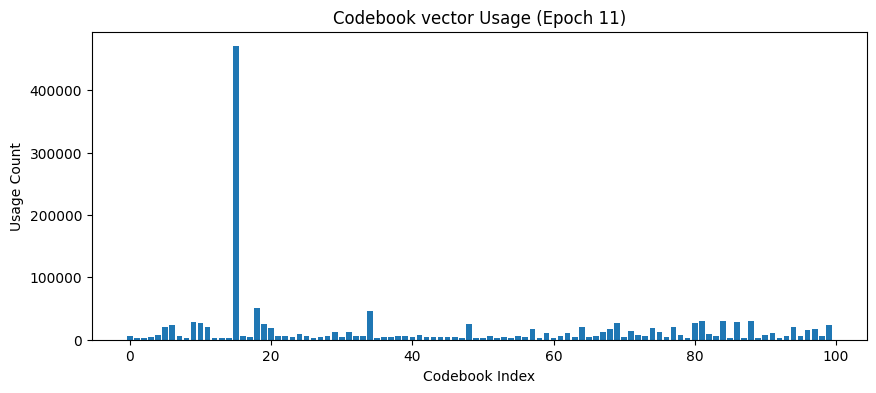

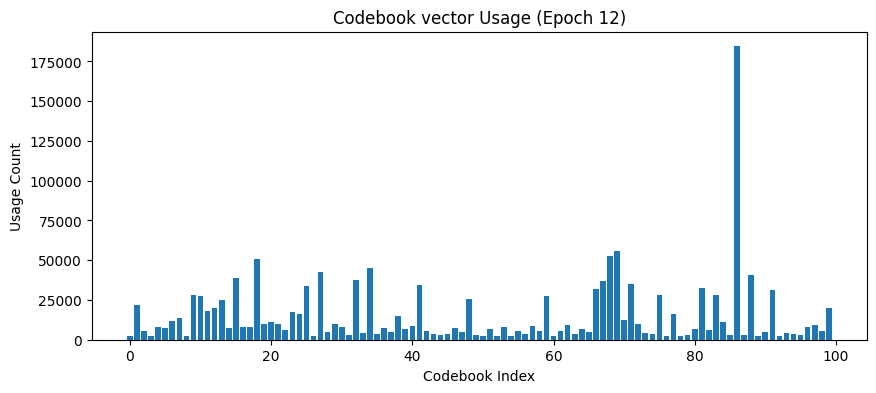

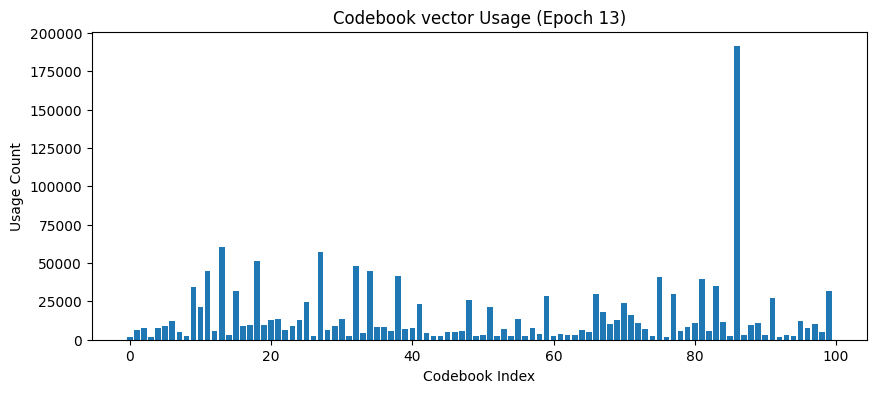

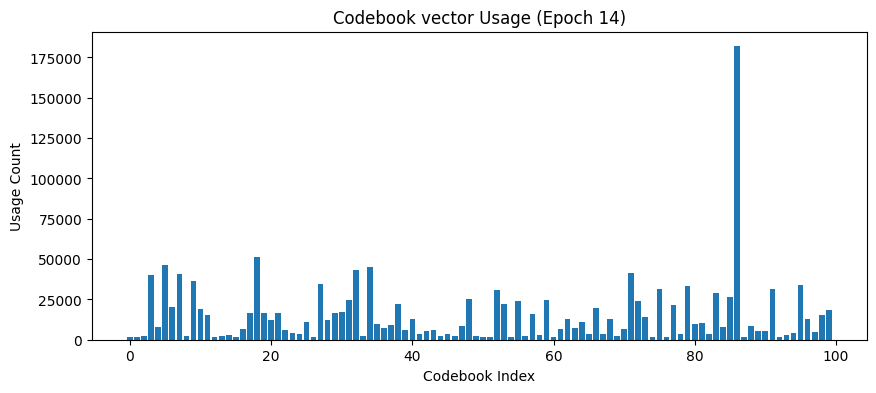

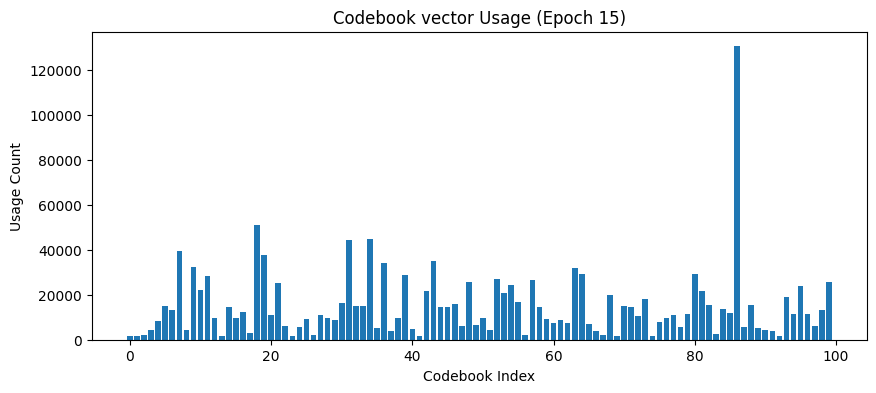

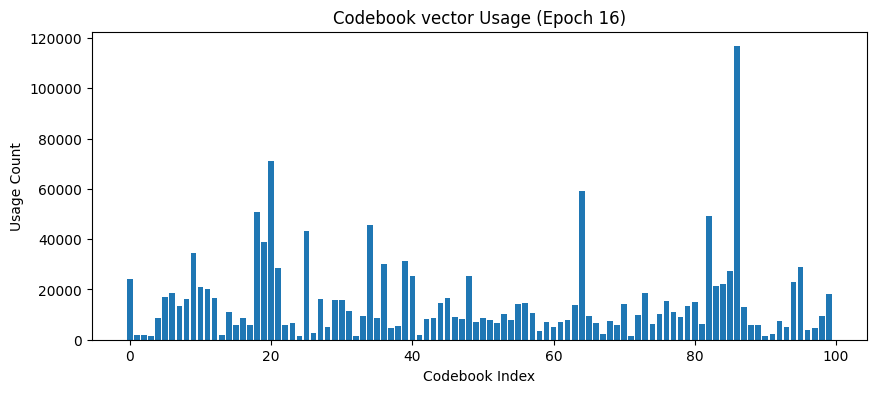

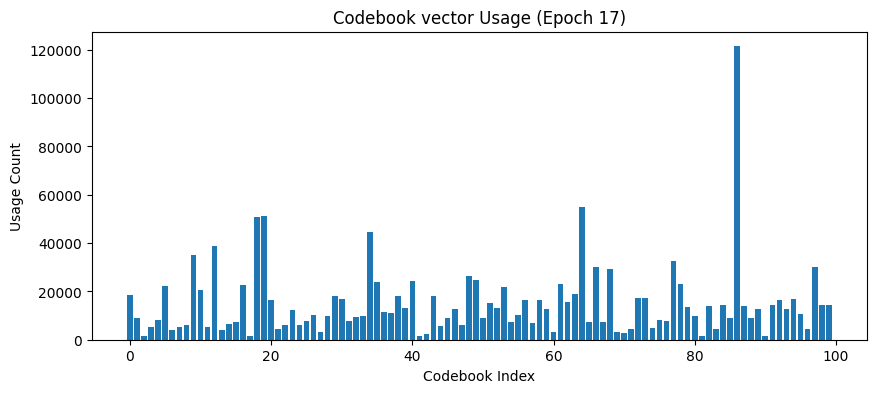

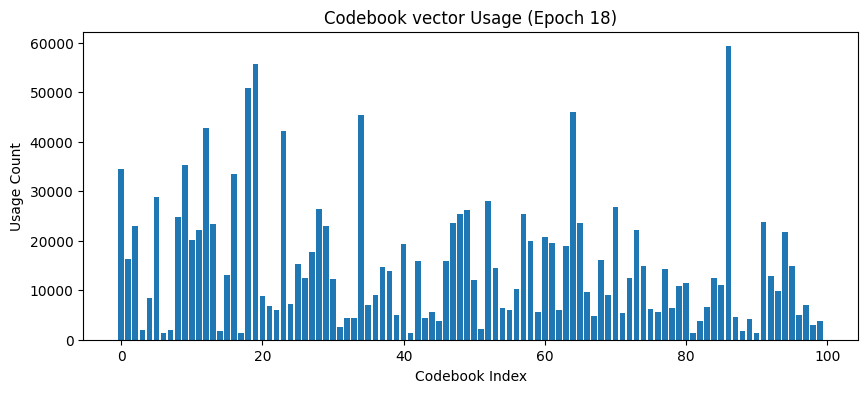

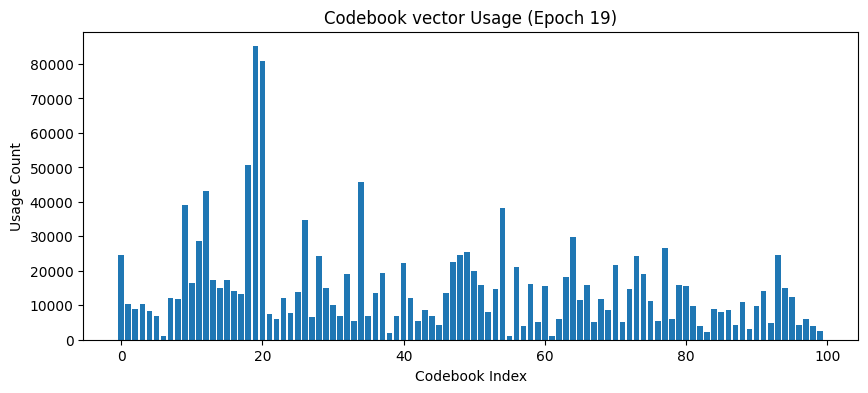

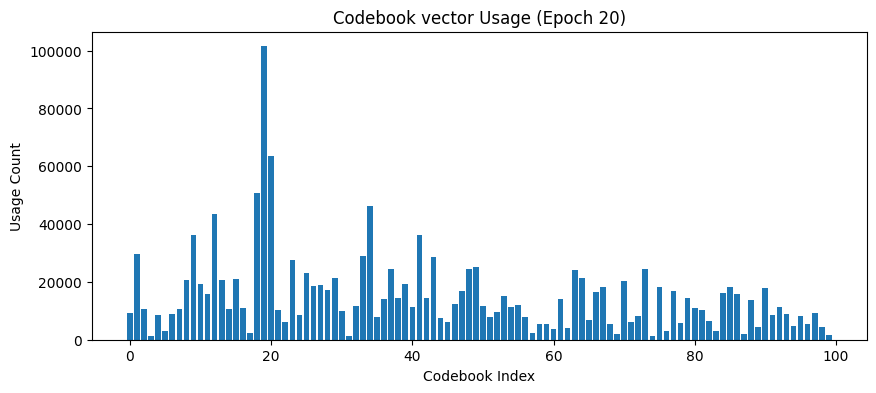

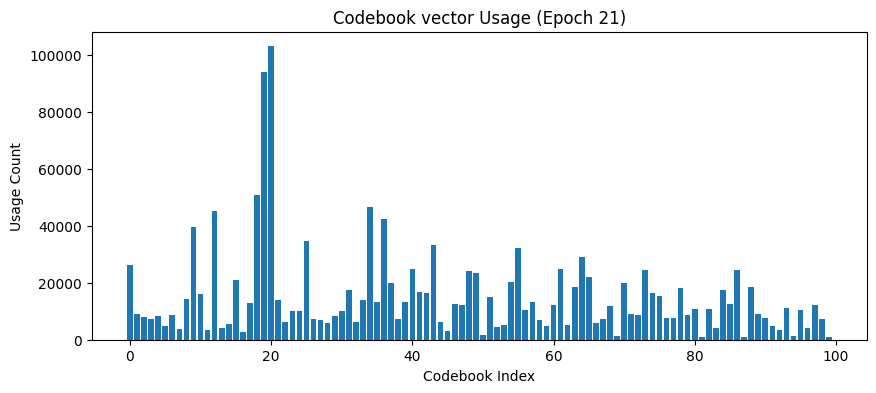

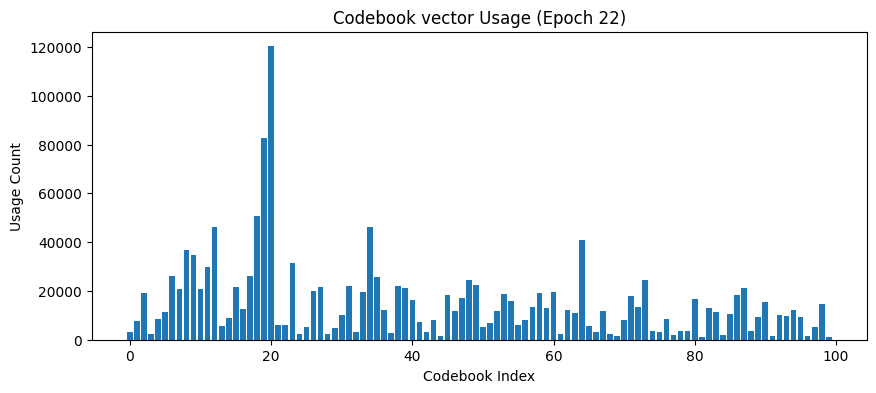

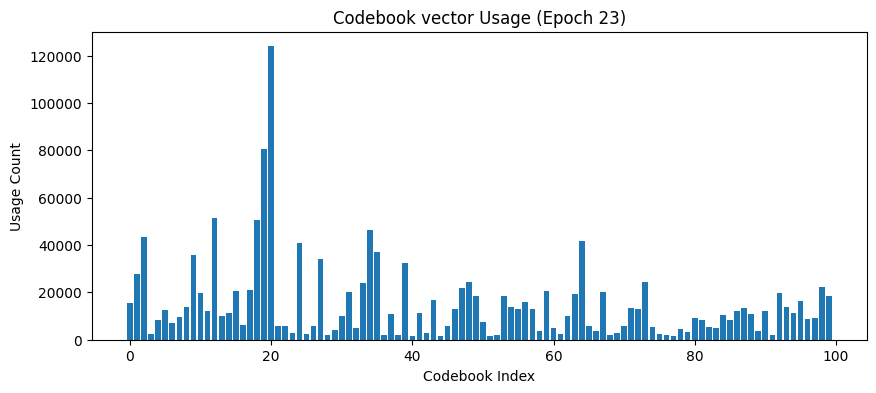

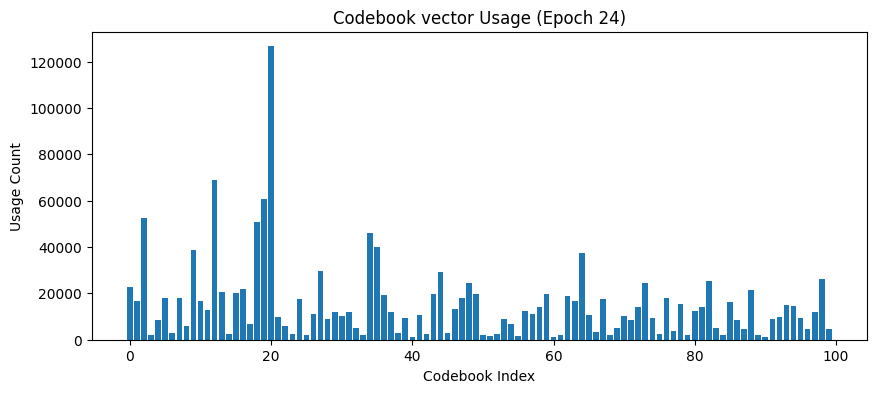

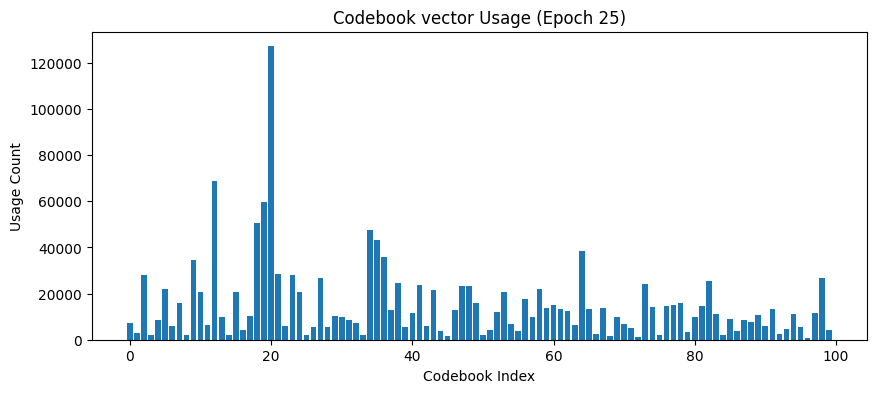

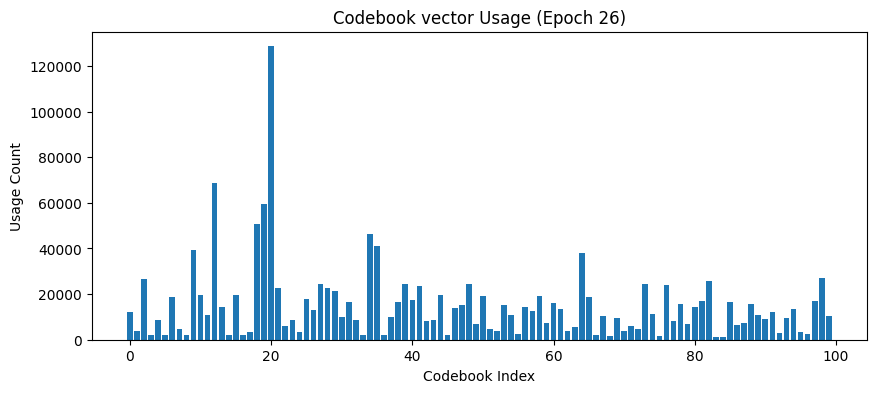

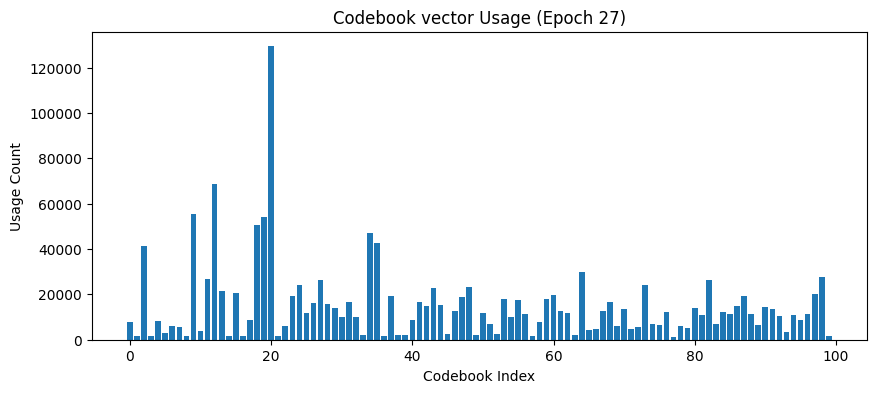

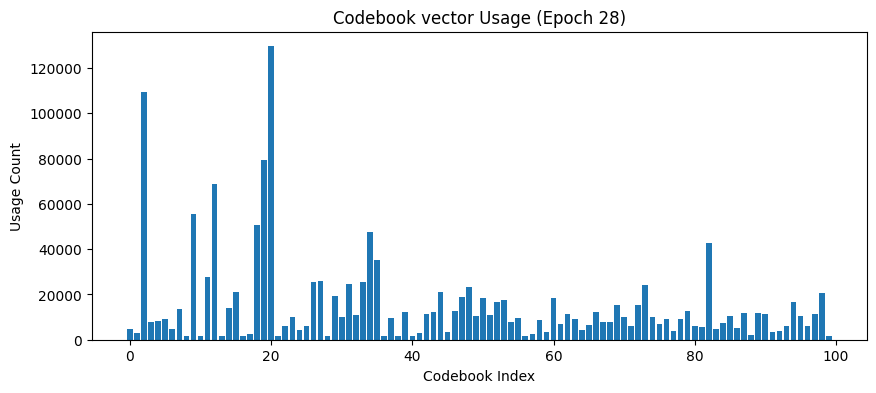

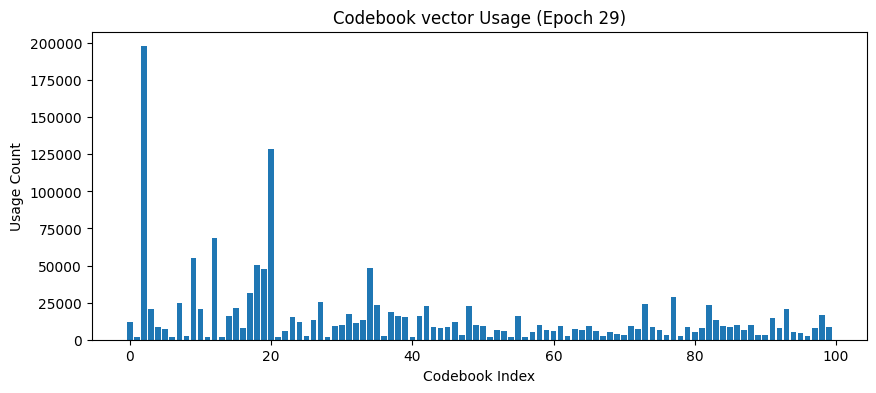

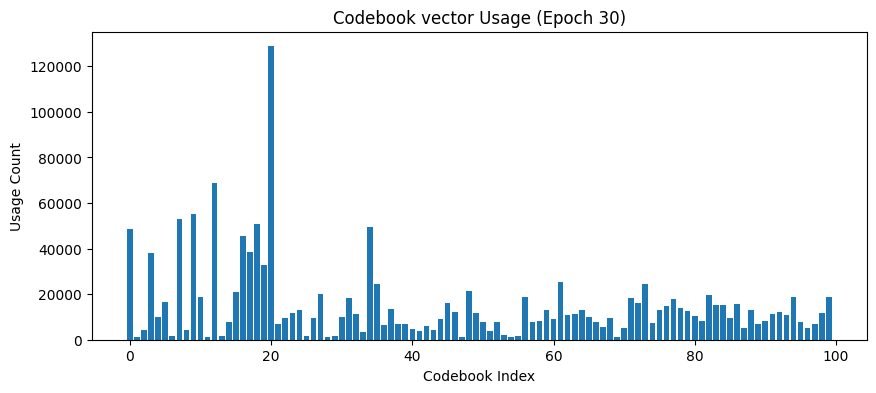

In [15]:
# 코드북 사용량 시각화
for epoch_idx, usage in enumerate(usage_history, 1):
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(NUM_EMBEDDINGS), usage)
    plt.title(f"Codebook vector Usage (Epoch {epoch_idx})")
    plt.xlabel("Codebook Index")
    plt.ylabel("Usage Count")
    plt.show()

In [16]:
import torch
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer

#  코드북 인덱스를 기반으로 Shannon Entropy 계산
def compute_entropy_from_indices(indices, num_embeddings):
    counts = np.bincount(indices, minlength=num_embeddings)
    probs = counts / (np.sum(counts) + 1e-9)
    return -np.sum(probs * np.log2(probs + 1e-9))


#  테스트 함수 정의
def analyze_sentences_entropy_np_norm(
    sentences,
    vqvae,
    num_embeddings=100,
    normalize_input=True,
    scale_factor=30.0  #  분산 확대
):
    # 평가 모드로 전환
    vqvae.eval()

    device = next(vqvae.parameters()).device

    # 모델 로딩
    model = SentenceTransformer("paraphrase-MiniLM-L6-v2").to(device)
    transformer = model[0].auto_model
    tokenizer = model.tokenizer
    transformer.eval()

    for i, sentence in enumerate(sentences, 1):
        print(f"\n[문장 {i}] {sentence}")
        with torch.no_grad():
            # 토큰 임베딩 추출
            inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
            outputs = transformer(**inputs)

            # 유효 토큰만 선택
            mask = inputs["attention_mask"].squeeze(0).bool()
            token_embs = outputs.last_hidden_state[0][mask].cpu().numpy()

            token_embs_tensor = torch.tensor(token_embs, dtype=torch.float32).to(device)

            # VQ-VAE에 통과
            _, z_e, z_q, indices, _, _, _ = vqvae(token_embs_tensor)
            indices_np = indices.cpu().numpy()

            #  토큰 - 코드북 인덱스 출력
            tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
            print("------------------------------")
            token_i = 0
            for token in tokens:
                if token not in ['[CLS]', '[SEP]', '[PAD]']:
                    print(f"{token:<16}→ {indices_np[token_i]}")
                    token_i += 1

            # Shannon Entropy 출력
            H = compute_entropy_from_indices(indices_np, num_embeddings)
            print(f" Shannon Entropy: {H:.4f} bits")


In [18]:
test_sentences = [
    "Yes.",
    "YES",
    "Yes, I understand.",
    "I'm fine, but it's been hard.",
    "Call me Sam, please",
    "Although artificial intelligence has made tremendous" ,
    "strides in recent years, there are still numerous ethical, social, and technical challenges that must be carefully addressed before fully integrating such systems into our daily lives.",
    ""
]
analyze_sentences_entropy_np_norm(test_sentences, vqvae, num_embeddings=100)


[문장 1] Yes.
------------------------------
yes             → 50
.               → 67
 Shannon Entropy: 2.0000 bits

[문장 2] YES
------------------------------
yes             → 50
 Shannon Entropy: 1.5850 bits

[문장 3] Yes, I understand.
------------------------------
yes             → 14
,               → 31
i               → 20
understand      → 48
.               → 58
 Shannon Entropy: 2.8074 bits

[문장 4] I'm fine, but it's been hard.
------------------------------
i               → 61
'               → 34
m               → 18
fine            → 15
,               → 22
but             → 20
it              → 93
'               → 73
s               → 18
been            → 15
hard            → 41
.               → 3
 Shannon Entropy: 3.3788 bits

[문장 5] Call me Sam, please
------------------------------
call            → 88
me              → 3
sam             → 34
,               → 77
please          → 20
 Shannon Entropy: 2.5216 bits

[문장 6] Although artificial intelligence has made trem